In [1]:
#Imports
import matplotlib.pyplot as plt
import math

In [2]:
#Cores
vermelho_escuro = "\033[31m"
azul = "\033[36m"
normal = "\033[0m"
vermelho = "\033[91m"

In [3]:
#Funções
def ChamarSatélite():
    '''
    Função que não recebe parâmetros e chama satélites, armazenando os valores X, Y (com ambos em uma tupla) e tempo até chegar 
    no ponto da pessoa de cada um deles dados pelo usuário.
    Caso a posição de um dos satélites seja igual a de um satélite anterior, será pedido um novo valor diferente.
    Caso o tempo de um dos satélites seja menor ou igual a 0, será pedido um novo valor positivo.
    Os dados recebidos serão armazenados em formato de matriz 3x3, onde cada linha é um satélite e cada coluna é X,Y e o tempo, respectivamente.
    Após a chamada de 3 satélites, o código retorna a matriz criada.
    Caso a posição de um dos satélites seja (0,0), o código é interrompido.
    '''
    satelites = []
    
    for I in range(1,4):
        Satelite_placeholder = []
        print(f'{azul}Norte -> valor {azul}positivo {normal} | {vermelho}Sul -> valor {vermelho}negativo {normal}')
        posicaoX = float(input(f'Digite a longitude do {I}° satélite: '))

        print(f'\n{azul}Leste -> valor positivo{normal} | {vermelho}Oeste -> valor negativo{normal}')
        posicaoY = float(input(f'Digite a latitude do {I}° satélite: '))

        if (posicaoX,posicaoY) == (0,0):
            break

        while True:
            if (len(satelites) >= 1 and (posicaoX,posicaoY) == satelites[0][0]) or (len(satelites) >= 2 and (((posicaoX,posicaoY) == satelites[1][0]) or ((posicaoX,posicaoY) == satelites[0][0]))):
                print(f'\n{vermelho_escuro}/SATÉLITES NÃO PODEM TER VALORES IGUAIS/{normal}\n')
                print(f'{azul}Norte -> valor {azul}positivo {normal} | {vermelho}Sul -> valor {vermelho}negativo {normal}')
                posicaoX = float(input(f'Digite a longitude do {I}° satélite: '))

                print(f'\n{azul}Leste -> valor positivo{normal} | {vermelho}Oeste -> valor negativo{normal}')
                posicaoY = float(input(f'Digite a latitude do {I}° satélite:  '))  

            else:
                break

        tempo = float(input(f'\nDigite o tempo que o {I}° satélite demorou: '))
        while tempo <= 0:
            print('O tempo fornecido deve ser positivo')
            tempo = float(input(f'\nDigite o tempo que o {I}° satélite demorou: '))

        Satelite_placeholder.append((posicaoX,posicaoY))
        Satelite_placeholder.append(tempo)
        satelites.append(Satelite_placeholder)
        print('')
    if len(satelites) == 3:
        return satelites
    return False

def NovaMatriz(DadosMatriz):
    '''
    Recebe uma matriz 3x3 (Vinda da função ChamarSatélite) com valores em latitude, longitude e tempo e retorna a matriz 
    com valores em coordenadas X e Y e a distância entre a pessoa e o satélite. 
    '''
    raio = 6378.14
    veloLuz = 299792.458

    resultado = []
    resultado.append([(DadosMatriz[0][0][0]*raio , DadosMatriz[0][0][1]*raio), DadosMatriz[0][1]*veloLuz])
    resultado.append([(DadosMatriz[1][0][0]*raio , DadosMatriz[1][0][1]*raio), DadosMatriz[1][1]*veloLuz])
    resultado.append([(DadosMatriz[2][0][0]*raio , DadosMatriz[2][0][1]*raio), DadosMatriz[2][1]*veloLuz])
    return resultado

def Calculo_de_posicao(matriz):
    '''
    Função que recebe a matriz transformada e faz o cálculo para descobrir X e Y.
    Dependendo dos dados, a função dará erro por divisão por 0, o qual irá avisar ao usuário que resultou em erro.
    Retorna em uma tupla os valores de X,Y 
    '''
    A = (-2 * matriz[0][0][0] + 2 * matriz[1][0][0])
    B = (-2 * matriz[0][0][1] + 2 * matriz[1][0][1]) 
    R1 = (matriz[0][1]**2)  - (matriz[1][1]**2) - (matriz[0][0][0]**2) + (matriz[1][0][0]**2) - (matriz[0][0][1]**2) + (matriz[1][0][1]**2)
    C = (-2 * matriz[1][0][0] + 2 * matriz[2][0][0])
    D = (-2 * matriz[1][0][1] + 2 * matriz[2][0][1]) 
    R2 = (matriz[1][1]**2)  - (matriz[2][1]**2) - (matriz[1][0][0]**2) + (matriz[2][0][0]**2) - (matriz[1][0][1]**2) + (matriz[2][0][1]**2)

    if (D * A - B * C) == 0:
        return 'ERRO: Divisão por 0\n'
    
    x = (R1 * D - R2 * B)/(D * A - B * C)
    y = (R1 * C - A * R2)/(B * C - A * D)      
    return x/6378.14,y/6378.14

def plotar_circulos(pontos, distancias):

    """
    Plota circulos representando as distancias de pontos especificos e maximiza a janela do grafico.
    Essa funcao recebe os pontos em x e y ( e não em longitude e latitude)

    Args:
        pontos (list of tuples): Lista de coordenadas (x, y) para os pontos.
        distancias (list of floats): Lista de distancias correspondentes a cada ponto.

    """
    SIZE = 15

    # Criacao da figura e dos eixos
    fig, ax = plt.subplots()

    # Maximizar a janela do grafico
    figManager = plt.get_current_fig_manager()
    figManager.full_screen_toggle()
    # Configuracoes de tamanho de fonte para diferentes elementos do grafico
    plt.rc('font', size=SIZE)          # Tamanho padrão do texto
    plt.rc('axes', titlesize=SIZE)     # Tamanho da fonte do título dos eixos
    plt.rc('axes', labelsize=SIZE)     # Tamanho da fonte dos rotulos dos eixos x e y
    plt.rc('xtick', labelsize=SIZE)    # Tamanho da fonte dos rotulos dos ticks do eixo x
    plt.rc('ytick', labelsize=SIZE)    # Tamanho da fonte dos rotulos dos ticks do eixo y
    plt.rc('legend', fontsize=SIZE)    # Tamanho da fonte da legenda

    # Definicao de cores para os pontos e circulos
    cores = ['b', 'y', 'r', 'k']

    # Plotar os pontos e os circulos correspondentes
    for i, ponto in enumerate(pontos[:-1]):
        ax.scatter(ponto[0], ponto[1], color=cores[i], label=f'Satélite {i+1}')
        circulo = plt.Circle((ponto[0], ponto[1]), distancias[i], color=cores[i], fill=False, linewidth=2)
        ax.add_artist(circulo)

    # Plotar o ultimo ponto (pessoa)
    ax.scatter(pontos[-1][0], pontos[-1][1], color=cores[-1], label='Pessoa')

    # Determinar os limites dos eixos com base nas distancias
    x_min = min(p[0] - d for p, d in zip(pontos[:-1], distancias))
    x_max = max(p[0] + d for p, d in zip(pontos[:-1], distancias))
    y_min = min(p[1] - d for p, d in zip(pontos[:-1], distancias))
    y_max = max(p[1] + d for p, d in zip(pontos[:-1], distancias))

    # Ajustar os limites dos eixos
    ax.set_xlim(x_min - 1e5, x_max + 1e5)
    ax.set_ylim(y_min - 1e5, y_max + 1e5)

    # Configuracoes dos rotulos e do aspecto dos eixos
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_aspect('equal', adjustable='box')

    # Adicionar legenda e grid ao grafico
    plt.legend()
    plt.grid(True)

    # Exibir o grafico
    # plt.show(block=False)
    plt.show()

def testar_resultado(matriz,valoresXY):
    '''
    Usa a matriz inicial e o valor encontrado com o calculo de posição para ver se, quando aplicado os valores na conta, o resultado é aproximadamente 0.
    A diferença máxima entre o resultado encontrado e 0 foi escolhida como 2, pois pequenos erros podem acontecer durante os calculos.
    '''
    calc1 = (valoresXY[0] - matriz[0][0][0])
    calc2 = (valoresXY[1] - matriz[0][0][1])
    calc3 = (matriz[0][1])
    resultado = ((calc1**2) + (calc2**2) - (calc3**2))/6378.14
    return (math.isclose(resultado,0, abs_tol=2)) 
    


Norte -> valor positivo  | Sul -> valor negativo 

Leste -> valor positivo | Oeste -> valor negativo

Norte -> valor positivo  | Sul -> valor negativo 

Leste -> valor positivo | Oeste -> valor negativo

Norte -> valor positivo  | Sul -> valor negativo 

Leste -> valor positivo | Oeste -> valor negativo

Posições X e Y -> 2.38,48.81
O resultado encontrado, quando testado, dará aproximadamente 0? True


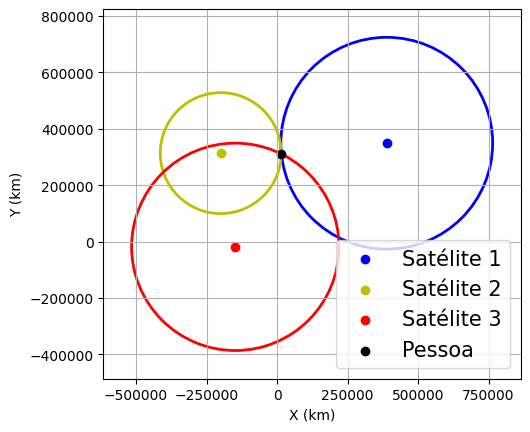

Norte -> valor positivo  | Sul -> valor negativo 

Leste -> valor positivo | Oeste -> valor negativo

VOCÊ CANCELOU O PROGRAMA


In [4]:
#Execução do código

while True:
    '''
    Durante o loop infinito, será pedido pontos de satélites até o valor ser 0,0.
    A cada 3 satélites informados, será feito os cálculos e será informado os valores de Xp e Yp e será feito o gráfico dos satélites e da pessoa.
    '''
    matriz = ChamarSatélite()
    if matriz == False:
        print('\nVOCÊ CANCELOU O PROGRAMA')
        break
    Matriz_satelites = NovaMatriz(matriz)
    print(f'Posições X e Y -> {round(Calculo_de_posicao(Matriz_satelites)[0],2)},{round(Calculo_de_posicao(Matriz_satelites)[1],2)}')
    if Calculo_de_posicao(Matriz_satelites) != 'ERRO: Divisão por 0\n':
        print('O resultado encontrado, quando testado, dará aproximadamente 0?',testar_resultado(matriz,Calculo_de_posicao(Matriz_satelites)))
        pontospessoa = (Calculo_de_posicao(Matriz_satelites)[0]*6378.14,Calculo_de_posicao(Matriz_satelites)[1]*6378.14)
        pontos = [(Matriz_satelites[0][0][0],Matriz_satelites[0][0][1]),(Matriz_satelites[1][0][0],Matriz_satelites[1][0][1]),(Matriz_satelites[2][0][0],Matriz_satelites[2][0][1]),pontospessoa]
        distancias = [Matriz_satelites[0][1],Matriz_satelites[1][1],Matriz_satelites[2][1]]
        plotar_circulos(pontos,distancias)

#TESTES A SEREM FEITOS:
#1 -> saída esperada: (2.35, 48.85)
# A: 61, 54.7, 1.252577
# B: -31.3, 49.2, 0.715147
# C: -23.2, -2.9, 1.226493

#2 -> saída esperada: (−42.8, −5.09)
# A: −25.6, −21.7, 0.508139
# B: −49, −38.3, 0.717951
# C: −78.6, 8.8, 0.816055

#3 -> saída esperada: (−43.21, −22.90)
# A: −153.3, −23.8, 2.339641
# B: −61.9, -54.8, 0.785704
# C: −121.9, 27.7, 1.988164

# referencia para a matemática usada:
# https://www.101computing.net/cell-phone-trilateration-algorithm/#:~:text=Trilateration%20calculations%20estimate%20the%20coordinates,to%20return%20back%20to%20the